In [5]:
import lanfactory
import pickle
import os
import numpy as np
from matplotlib import pyplot as plt

## LAN

In [4]:
# Specify path to network
lan_state_dict_path = "/users/afengler/data/proj_lan_pipeline/" + \
            "LAN_scripts/local_tests/data/networks/lan/" + \
            "jax/ddm/ddm_lan_f010ef48cda011edada9a0423f3e9a48_train_state.jax"

lan_config_path = "/users/afengler/data/proj_lan_pipeline/" + \
              "LAN_scripts/local_tests/data/networks/lan/" + \
              "jax/ddm/ddm_lan_f010ef48cda011edada9a0423f3e9a48_network_config.pickle"

lan_config_dict = pickle.load(open(lan_config_path, 'rb'))

In [9]:
# Load network
from lanfactory.trainers import MLPJaxFactory

lan_eval = lanfactory.trainers.MLPJaxFactory(network_config = lan_config_dict,
                                             train = False)


lan_forward, lan_forward_jitted = net_eval.make_forward_partial(seed = 42,
                                                                state_dict_from_file = True,
                                                                file_path = lan_state_dict_path,
                                                                add_jitted = True,
                                                                )

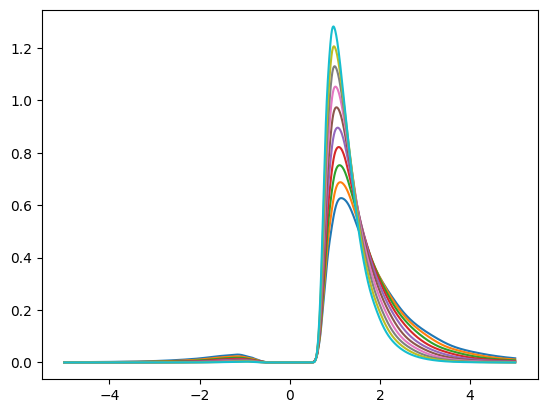

In [11]:
# Make some input data
import jax.numpy as jnp
for i in np.linspace(1., 2., 10):
    inp_ = np.zeros((2000, 6))
    inp_[:, 0] = i
    inp_[:, 1] = 1.5
    inp_[:, 2] = 0.5
    inp_[:, 3] = 0.5
    inp_[:, 4] = np.concatenate([np.linspace(5, 0, 1000), np.linspace(0, 5, 1000)])
    inp_[:, 5] = np.concatenate([(-1)*np.ones(1000), np.ones(1000)])


    plt.plot(inp_[:, 4] * inp_[:, 5], jnp.exp(lan_forward_jitted(inp_)))

## CPN

In [2]:
# Specify path to network
import pickle
cpn_state_dict_path = "/users/afengler/data/proj_lan_pipeline/LAN_scripts/local_tests/data/" + \
                          "networks/cpn/jax/ddm/" + \
                          "ddm_cpn_98de23f6ce7e11edbb63a0423f3e9a48_train_state.jax"

cpn_config_path = "/users/afengler/data/proj_lan_pipeline/LAN_scripts/local_tests/data/" + \
                      "networks/cpn/jax/ddm/" + \
                      "ddm_lan_98de23f6ce7e11edbb63a0423f3e9a48_network_config.pickle"

cpn_config_dict = pickle.load(open(cpn_config_path, 'rb'))

In [3]:
cpn_config_dict

{'layer_sizes': [100, 100, 100, 1],
 'activations': ['tanh', 'tanh', 'tanh', 'linear'],
 'train_output_type': 'logits',
 'network_type': 'cpn'}

In [6]:
# Load network
from lanfactory.trainers import MLPJaxFactory

cpn_eval = lanfactory.trainers.MLPJaxFactory(network_config = cpn_config_dict,
                                             train = False)


cpn_forward, cpn_forward_jitted = cpn_eval.make_forward_partial(seed = 42,
                                                                state_dict_from_file = True,
                                                                file_path = cpn_state_dict_path,
                                                                add_jitted = True,
                                                                )

(0.0, 1.0)

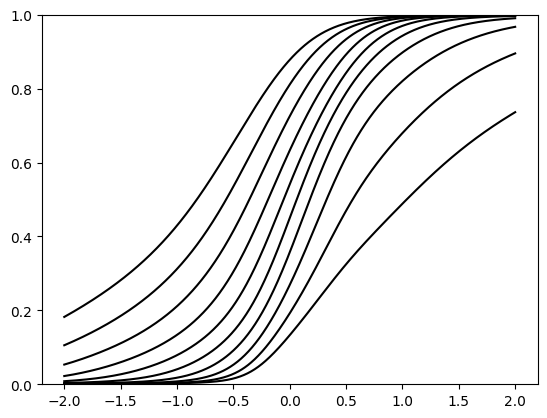

In [9]:
import jax.numpy as jnp
for i in np.linspace(0.1, 0.9, 10):
    dat_tmp = np.zeros((1000, 4))
    dat_tmp[:, 0] = np.linspace(-2, 2, 1000) 
    dat_tmp[:, 1] = 1.5 
    dat_tmp[:, 2] = i 
    dat_tmp[:, 3] = 1. 
    plt.plot(dat_tmp[:, 0], jnp.exp(cpn_forward_jitted(dat_tmp)), color = 'black')
    
plt.ylim(0, 1)